In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
#Label encoding object
data_types_dict=dict(data.dtypes)
#keep tracking Mapping column name to LabelEncoders
Label_encoder_collection={}

for col_name,data_type in data_types_dict.items():
  if data_type=='object':
    Le=LabelEncoder()
    data[col_name]=Le.fit_transform(data[col_name])
    Label_encoder_collection[col_name]=Le


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x=data.iloc[:,:-1].values.astype(np.float32)
y=data.iloc[:,-1].values.astype(int)

In [ ]:
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085578e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888523e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190781e+04]], dtype=float32)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
xtrain ,xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
xtrain.shape

(8000, 10)

In [ ]:
xtest.shape

(2000, 10)

In [ ]:
ytrain.shape

(8000,)

In [ ]:
ytest.shape

(2000,)

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                352       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#optimizer is used for compile the model
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 4ms/step - loss: 459.2843 - accuracy: 0.6323 - val_loss: 158.2840 - val_accuracy: 0.7480
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 284.4453 - accuracy: 0.6518 - val_loss: 134.4738 - val_accuracy: 0.7495
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 291.2811 - accuracy: 0.6639 - val_loss: 330.3479 - val_accuracy: 0.2280
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 266.8351 - accuracy: 0.6708 - val_loss: 41.8401 - val_accuracy: 0.7580
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 300.8433 - accuracy: 0.6711 - val_loss: 77.6073 - val_accuracy: 0.6340
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 247.7345 - accuracy: 0.6810 - val_loss: 255.7589 - val_accuracy: 0.2740
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 199.4733 - accuracy: 0.6786 - val_loss: 201.1132 - v

<function matplotlib.pyplot.show(*args, **kw)>

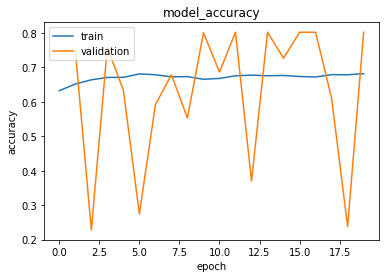

In [ ]:
#Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

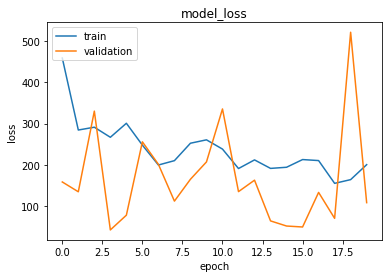

In [ ]:
#Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show

In [ ]:
#collect prediction
predictions=np.round(model.predict(xtest))
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,predictions)

0.8705

In [ ]:
confusion_matrix(ytest,predictions)

array([[1549,   55],
       [ 204,  192]])

In [ ]:
#Results are not so good 
#Improve the results by using Dropout and Batch Normalization

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
x=data.iloc[:,:-1].values.astype(np.float32)
y=data.iloc[:,-1].values.astype(int)

In [ ]:
xtrain ,xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
#So Add class weights when data is imbalanced

from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weight=compute_class_weight(class_weight='balanced',classes=np.unique(ytrain),y=ytrain)

In [ ]:
model_class_weights={}
for e ,weight in enumerate(class_weight):
  model_class_weights[e]=weight

In [ ]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [ ]:
#add class weights to handle imbalance data
#increase hidden layers and increase units of dense layer
#add batchnormalization to layers
#add dropout after layers
#its all  backpropogation 


model=tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 128)               1408      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.4692 - accuracy: 0.7870 - val_loss: 0.4065 - val_accuracy: 0.8320
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8265 - val_loss: 0.3462 - val_accuracy: 0.8620
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3924 - accuracy: 0.8304 - val_loss: 0.3465 - val_accuracy: 0.8565
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3816 - accuracy: 0.8429 - val_loss: 0.3355 - val_accuracy: 0.8635
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3822 - accuracy: 0.8382 - val_loss: 0.3357 - val_accuracy: 0.8610
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8465 - val_loss: 0.3334 - val_accuracy: 0.8670
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8438 - val_loss: 0.3351 - val_accuracy: 0.8645
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

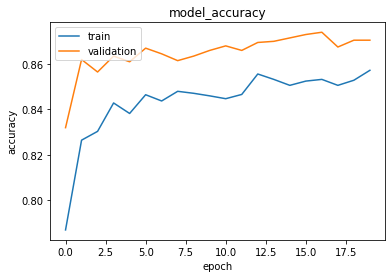

In [ ]:
#Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

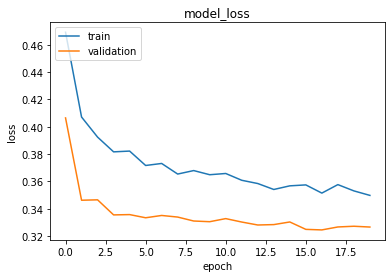

In [ ]:
#Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show

In [ ]:
#collect prediction
predictions=np.round(model.predict(xtest))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,predictions)

0.8705

In [ ]:
confusion_matrix(ytest,predictions)

array([[1549,   55],
       [ 204,  192]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.78      0.48      0.60       396

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

